 <div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#025F5F"> <b>Machine Learning</b><br><br>Project 2 Intruduction to Machine learning </i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>

Mohammad Taha Majlesi - 810101504



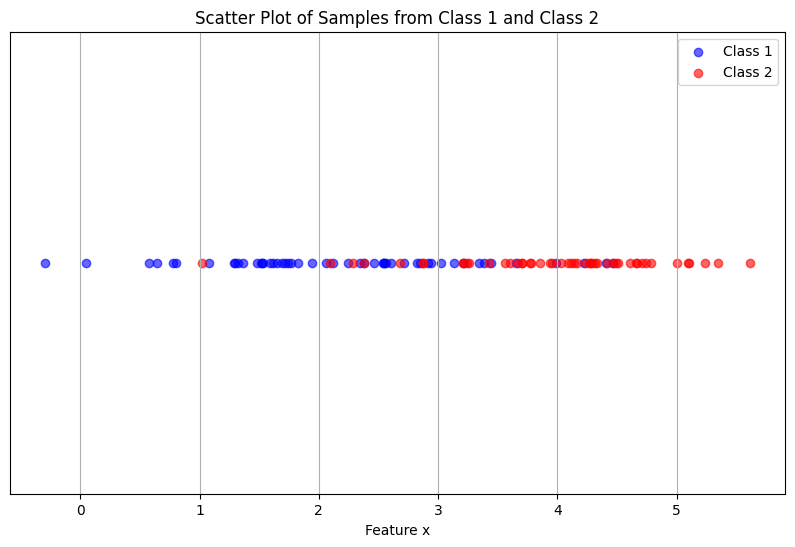

Decision Boundary (Threshold): x = 3.0


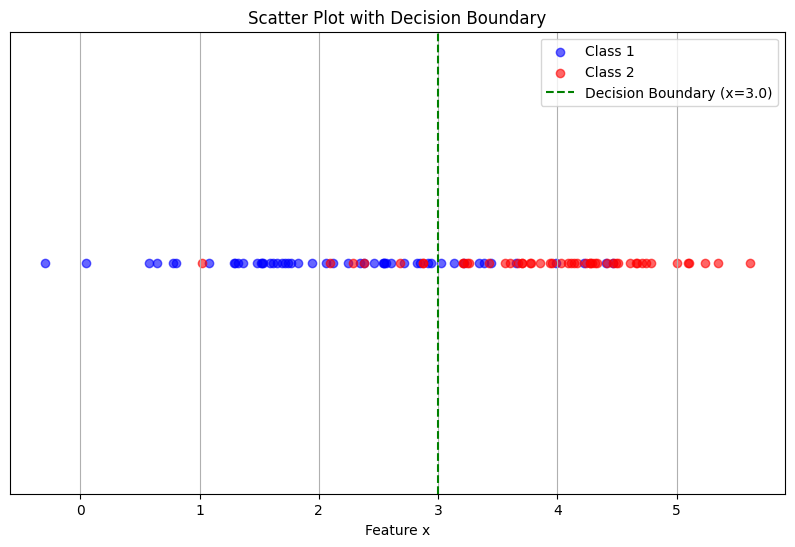

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = 2
sigma1 = 1
mu2 = 4
sigma2 = 1
pi1 = 0.5
pi2 = 0.5

n_samples = 100  

np.random.seed(10)

classes = np.random.choice([0, 1], size=n_samples, p=[pi1, pi2])

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

X = np.random.normal(mu[classes], sigma[classes])

y_true = classes

x1 = X[classes == 0]
x2 = X[classes == 1]

plt.figure(figsize=(10, 6))
plt.scatter(x1, np.zeros_like(x1), color='blue', alpha=0.6, label='Class 1')
plt.scatter(x2, np.zeros_like(x2), color='red', alpha=0.6, label='Class 2')
plt.title('Scatter Plot of Samples from Class 1 and Class 2')
plt.xlabel('Feature x')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

threshold = (mu1 + mu2) / 2
print(f"Decision Boundary (Threshold): x = {threshold}")

plt.figure(figsize=(10, 6))
plt.scatter(x1, np.zeros_like(x1), color='blue', alpha=0.6, label='Class 1')
plt.scatter(x2, np.zeros_like(x2), color='red', alpha=0.6, label='Class 2')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Decision Boundary (x={threshold})')
plt.title('Scatter Plot with Decision Boundary')
plt.xlabel('Feature x')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

def classify(x, threshold):
    return np.where(x >= threshold, 1, 0)

y_pred = classify(X, threshold)


In [2]:
threshold = (mu1 + mu2) / 2
print(f"Decision Boundary (Threshold): x = {threshold}")


Decision Boundary (Threshold): x = 3.0


In [3]:
def classify(x, threshold):
    return np.where(x >= threshold, 1, 0)


In [4]:
tp = fp = tn = fn = 0

for true_label, pred_label in zip(y_true, y_pred):
    if true_label == 1 and pred_label == 1:
        tp += 1 
    elif true_label == 0 and pred_label == 1:
        fp += 1
    elif true_label == 0 and pred_label == 0:
        tn += 1 
    elif true_label == 1 and pred_label == 0:
        fn += 1 

confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[40 11]
 [ 7 42]]


In [5]:

confusion_mat = np.array([[tp, fp],
                          [fn, tp]])

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


print("Confusion Matrix:")
print(confusion_mat)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Positive Class): {precision:.2f}")
print(f"Recall (Positive Class): {recall:.2f}")
print(f"F1-Score (Positive Class): {f1_score:.2f}")


Confusion Matrix:
[[42 11]
 [ 7 42]]
Accuracy: 0.82
Precision (Positive Class): 0.79
Recall (Positive Class): 0.86
F1-Score (Positive Class): 0.82


In [14]:
def discriminant_score(x):
    term1 = -((x - mu1)**2) / (2 * sigma1**2) + np.log(pi1)
    term2 = -((x - mu2)**2) / (2 * sigma2**2) + np.log(pi2)
    return term1 - term2

scores = discriminant_score(X)
print(X)


[ 5.10770823  2.24454398  3.93808797  3.24610704  2.71195902  2.91826915
  1.51790686  4.08958761  2.82699862  0.04548788  4.11747566  2.09254311
  1.07709074  4.46975143  3.85563324  3.59986165  3.70401615  2.84820861
  4.70683045  3.21273107  4.29294072  1.52919275  4.40432561  3.26064326
  1.68717124  1.65111808  3.56097376  4.14110417  4.27304932  2.38142925
  3.42688664  2.67955245  5.23620533  4.46532508  3.38323223  2.34623312
  3.02251611  4.16681027  3.65671662  4.66788961  3.77005336  2.87044881
  1.3600374   4.31383052  0.77416402  3.77820686  3.33992631  4.02930971
  3.98538575  3.4471656   1.71237059  0.64068943  3.95195867  1.51921266
  2.37775309  5.61440797  2.87689596  1.61127205  4.33234995  3.13497317
  4.51071441  4.41429764  5.34454942  4.49351532  1.76299582  2.05728515
  1.29292855  2.54666484  2.94250041  1.02040323  3.21814885  1.94347928
  2.46088845  4.66237401 -0.29510333  0.80407069  3.66689884  3.20860923
  4.27417278  1.48509008  2.2889288   4.61229731  5

In [17]:
sorted_scores = np.sort(scores)
thresholds = np.concatenate(([sorted_scores[0] - 1], sorted_scores, [sorted_scores[-1] + 1]))
print(thresholds)

tpr_list = []
fpr_list = []

for tau in thresholds:
    y_pred_tau = np.where(scores >= tau, 1, 0)
    
    tp_tau = np.sum((y_true == 1) & (y_pred_tau == 1))
    fp_tau = np.sum((y_true == 0) & (y_pred_tau == 1))
    tn_tau = np.sum((y_true == 0) & (y_pred_tau == 0))
    fn_tau = np.sum((y_true == 1) & (y_pred_tau == 0))
    
    tpr = tp_tau / (tp_tau + fn_tau) if (tp_tau + fn_tau) > 0 else 0
    fpr = fp_tau / (fp_tau + tn_tau) if (fp_tau + tn_tau) > 0 else 0

    tpr_list.append(tpr)
    fpr_list.append(fpr)
print(tpr_list)
print(fpr_list)

[-6.22881595 -5.22881595 -4.68909885 -4.47241065 -4.21541647 -4.20025875
 -4.01372228 -3.56355038 -3.48794881 -3.41366091 -3.33577922 -3.32474802
 -3.22459462 -3.02142882 -2.98703063 -2.93950287 -2.93065016 -2.82859528
 -2.80865121 -2.6646999  -2.62766104 -2.58588145 -2.54834556 -2.54609864
 -2.48922904 -2.45009928 -2.33362053 -2.28220834 -2.23495132 -2.17917523
 -2.05861942 -1.97077149 -1.90391735 -1.87617594 -1.71126647 -1.55641373
 -1.54010671 -1.41114799 -1.40803229 -1.33379768 -1.31343325 -1.1997233
 -1.12194753 -0.8943312  -0.85377328 -0.76646446 -0.67985262 -0.52128652
 -0.49221408 -0.4362977  -0.42546215 -0.41721846 -0.26994635 -0.04503221
  0.11499918  0.1634617   0.24620807  0.25910239  0.30358278  0.34600275
  0.57608197  0.64089509  0.7936019   0.87129495  0.90314387  0.90667032
  0.93223038  1.0782231   1.2371415   1.24449383  1.30753377  1.42214239
  1.51091205  1.76563716  1.81491378  1.8854297   2.11304145  2.35459765
  2.47400837  2.52171896  2.57525883  2.62565751  2.

In [8]:
fpr_array = np.array(fpr_list)
tpr_array = np.array(tpr_list)

sorted_indices = np.argsort(fpr_array)
fpr_array = fpr_array[sorted_indices]
tpr_array = tpr_array[sorted_indices]

auroc = np.trapz(tpr_array, fpr_array)

print(f"Area Under the ROC Curve (AUROC): {auroc:.2f}")


Area Under the ROC Curve (AUROC): 0.11


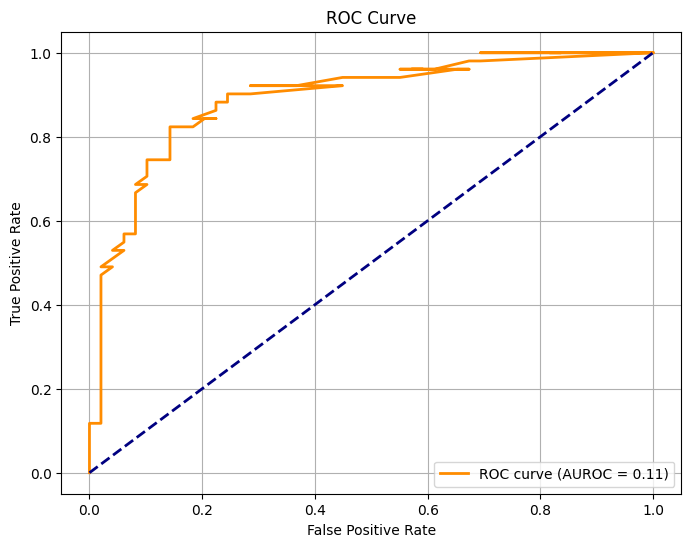

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(tpr_array,fpr_array, color='darkorange', lw=2,
         label=f'ROC curve (AUROC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


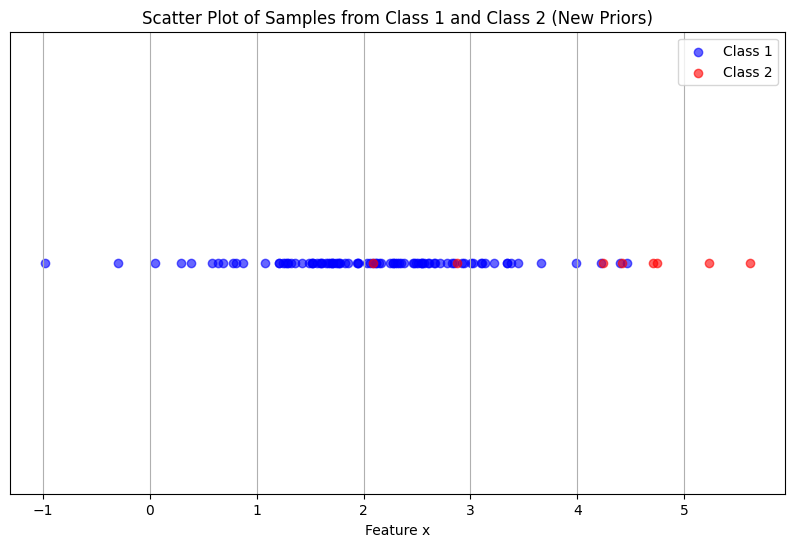

New Decision Boundary (Threshold): x = 4.10


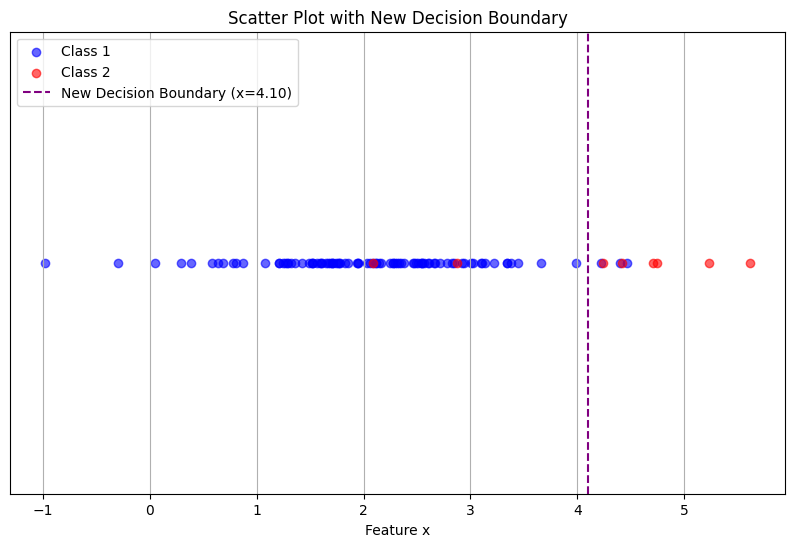

Confusion Matrix with New Priors:
[[89  3]
 [ 2  6]]
Accuracy: 0.95
Precision (Positive Class): 0.67
Recall (Positive Class): 0.75
F1-Score (Positive Class): 0.71
Area Under the ROC Curve (AUROC) with New Priors: 0.09


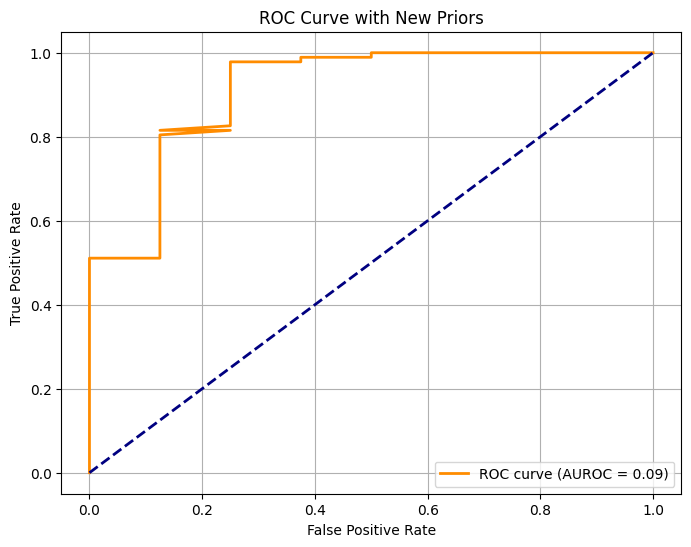

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = 2
sigma1 = 1
mu2 = 4
sigma2 = 1
pi1_new = 0.9
pi2_new = 0.1

n_samples = 100

np.random.seed(10)

classes_new = np.random.choice([0, 1], size=n_samples, p=[pi1_new, pi2_new])

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

X_new = np.random.normal(mu[classes_new], sigma[classes_new])

y_true_new = classes_new

x1_new = X_new[classes_new == 0]
x2_new = X_new[classes_new == 1]

plt.figure(figsize=(10, 6))
plt.scatter(x1_new, np.zeros_like(x1_new), color='blue', alpha=0.6, label='Class 1')
plt.scatter(x2_new, np.zeros_like(x2_new), color='red', alpha=0.6, label='Class 2')
plt.title('Scatter Plot of Samples from Class 1 and Class 2 (New Priors)')
plt.xlabel('Feature x')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

sigma = sigma1
threshold_new = ((mu1 + mu2) / 2) + (sigma**2 / (mu2 - mu1)) * np.log(pi1_new / pi2_new)
print(f"New Decision Boundary (Threshold): x = {threshold_new:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(x1_new, np.zeros_like(x1_new), color='blue', alpha=0.6, label='Class 1')
plt.scatter(x2_new, np.zeros_like(x2_new), color='red', alpha=0.6, label='Class 2')
plt.axvline(x=threshold_new, color='purple', linestyle='--',
            label=f'New Decision Boundary (x={threshold_new:.2f})')
plt.title('Scatter Plot with New Decision Boundary')
plt.xlabel('Feature x')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

def classify(x, threshold):
    return np.where(x >= threshold, 1, 0)

y_pred_new = classify(X_new, threshold_new)

TP = FP = TN = FN = 0

for true_label, pred_label in zip(y_true_new, y_pred_new):
    if true_label == 1 and pred_label == 1:
        TP += 1
    elif true_label == 0 and pred_label == 1:
        FP += 1
    elif true_label == 0 and pred_label == 0:
        TN += 1
    elif true_label == 1 and pred_label == 0:
        FN += 1

confusion_mat_new = np.array([[TN, FP],
                              [FN, TP]])

print("Confusion Matrix with New Priors:")
print(confusion_mat_new)

total = TP + TN + FP + FN

accuracy_new = (TP + TN) / total

precision_new = TP / (TP + FP) if (TP + FP) > 0 else 0
recall_new = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score_new = 2 * (precision_new * recall_new) / (precision_new + recall_new) if (precision_new + recall_new) > 0 else 0

print(f"Accuracy: {accuracy_new:.2f}")
print(f"Precision (Positive Class): {precision_new:.2f}")
print(f"Recall (Positive Class): {recall_new:.2f}")
print(f"F1-Score (Positive Class): {f1_score_new:.2f}")

def discriminant_score_new(x):
    term1 = -((x - mu1)**2) / (2 * sigma1**2) + np.log(pi1_new)
    term2 = -((x - mu2)**2) / (2 * sigma2**2) + np.log(pi2_new)
    return term1 - term2

scores_new = discriminant_score_new(X_new)

thresholds = np.sort(np.unique(scores_new))
thresholds = np.concatenate(([scores_new.min() - 1], thresholds, [scores_new.max() + 1]))

tpr_list = []
fpr_list = []

for thresh in thresholds:
    y_pred_thresh = np.where(scores_new >= thresh, 1, 0)
    
    TP = np.sum((y_true_new == 1) & (y_pred_thresh == 1))
    FP = np.sum((y_true_new == 0) & (y_pred_thresh == 1))
    TN = np.sum((y_true_new == 0) & (y_pred_thresh == 0))
    FN = np.sum((y_true_new == 1) & (y_pred_thresh == 0))
    
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

tpr_array = np.array(tpr_list)
fpr_array = np.array(fpr_list)

sorted_indices = np.argsort(fpr_array)
fpr_array = fpr_array[sorted_indices]
tpr_array = tpr_array[sorted_indices]

auroc_new = np.trapz(tpr_array, fpr_array)

print(f"Area Under the ROC Curve (AUROC) with New Priors: {auroc_new:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(tpr_array,fpr_array, color='darkorange', lw=2,
         label=f'ROC curve (AUROC = {auroc_new:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve with New Priors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
